['Sokoto' 'Borno' 'Lake' 'Yobe' 'Katsina' 'Kebbi' 'Zamfara' 'Jigawa'
 'Kano' 'Bauchi' 'Kaduna' 'Niger' 'Gombe' 'Adamawa' 'Plateau' 'Kwara'
 'Taraba' 'Nassarawa' 'Abuja' 'Oyo' 'Kogi' 'Benue' 'Osun' 'Ekiti' 'Ondo'
 'Edo' 'Ogun' 'Enugu' 'Cross River' 'Ebonyi' 'Anambra' 'Lagos' 'Delta'
 'Abia' 'Imo' 'Rivers' 'Akwa Ibom' 'Bayelsa']


Shape #617: POLYGON

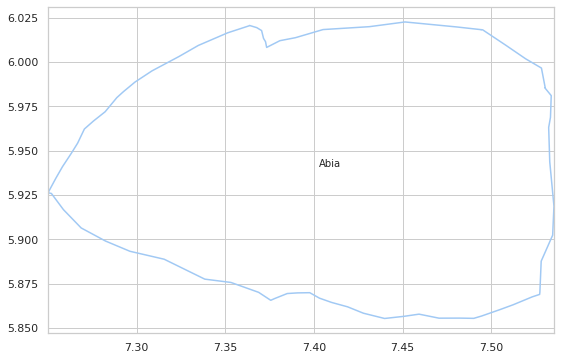

In [12]:
import sys
sys.path.append('/home/momo/anaconda3/lib/python3.8/site-packages')
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel", color_codes=True) 
sns.mpl.rc("figure", figsize=(10,6))

#opening the vector map
shp_path = "new_lga_nigeria_2003.shp"
#reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path)

len(sf.shapes())

sf.records()

def read_shapefile(sf):
    #fetching the headings from the shape file
    fields = [x[0] for x in sf.fields][1:]
#fetching the records from the shape file
    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]
#converting shapefile data into pandas dataframe
    df = pd.DataFrame(columns=fields, data=records)
#assigning the coordinates
    df = df.assign(coords=shps)
    return df

df = read_shapefile(sf)
df.shape

print(df.STATE.unique())

def plot_shape(id, s=None):
    plt.figure()
    #plotting the graphical axes where map ploting will be done
    ax = plt.axes()
    ax.set_aspect('equal')
#storing the id number to be worked upon
    shape_ex = sf.shape(id)
#NP.ZERO initializes an array of rows and column with 0 in place of each elements 
    #an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    x_lon = np.zeros((len(shape_ex.points),1))
#an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
#plotting using the derived coordinated stored in array created by numpy
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
# use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

STATE = 'Abia'
##to get the id of the city map to be plotted
com_id = df[df.STATE == 'Abia'].index.values[0]
plot_shape(com_id, STATE)
sf.shape(com_id)


Shape #201: POLYGON

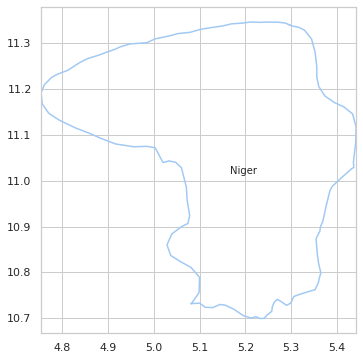

In [2]:
STATE = 'Niger'
##to get the id of the city map to be plotted
com_id = df[df.STATE == 'Niger'].index.values[0]
plot_shape(com_id, STATE)
sf.shape(com_id)

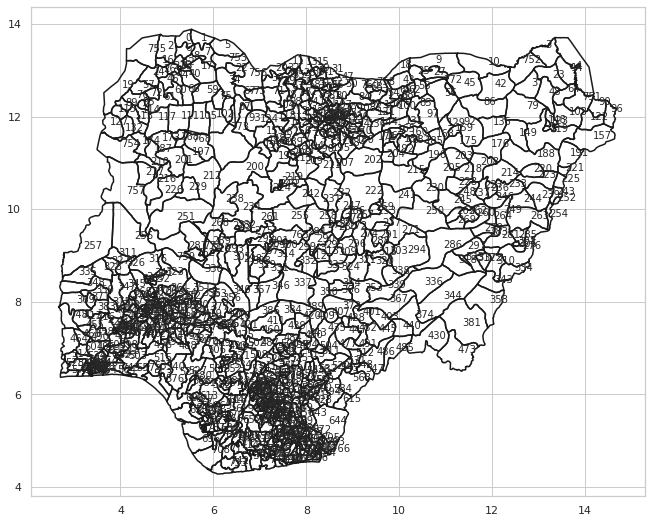

In [3]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
#calling the function and passing required parameters to plot the full map
plot_map(sf)


1: 100 => 299

2: 300 => 399

3: 400 => 499

4: 500 => 599

5: 600 => 1765

6: 1766 => 399999


   1   2   3   4   5   6
617
221
669
535
617
85
678
373
3
522
571
532
448
380
203
628
190
80
11
19
340
80
256
542
299
458
419
378
311
247
652
0
286


IndexError: list index out of range

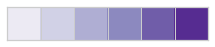

<Figure size 792x648 with 0 Axes>

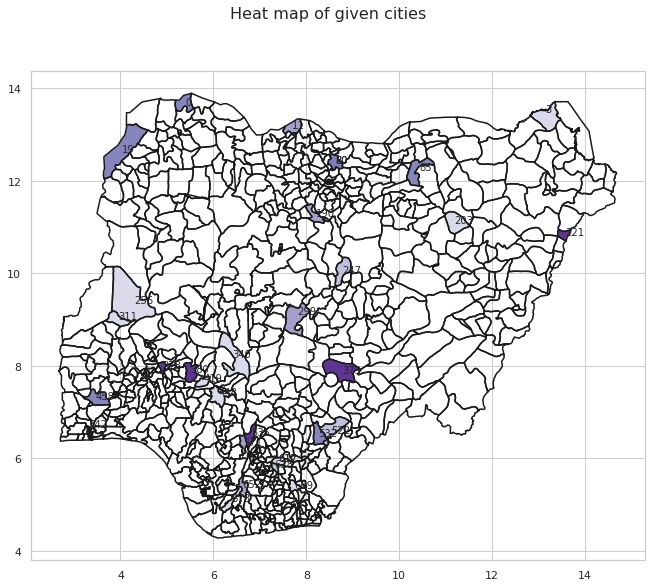

In [17]:
def calc_color(data, color=None):
        if color   == 1: 
            color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0','#807dbaF0','#6a51a3F0','#54278fF0']; 
            colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3: 
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd','#969696','#636363','#252525']; 
            colors = 'Greys';
        elif color == 9: 
            color_sq = ['#ff0000','#ff0000','#ff0000','#ff0000','#ff0000','#ff0000'];
                        
        else:           
            color_sq = ['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1))
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

def plot_cities_data(sf, title, cities, data=None,color=None, print_id=False):
 
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    city_id = []
    for i in cities:
        #print(i)
        #print(df[df.STATE  == "Adamawa" ].index.values[0])
        city_id.append(df[df.STATE == 
                            i].index.values[0])
    plot_map_fill_multiples_ids_tone(sf, title, city_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));
    
def plot_map_fill_multiples_ids_tone(sf, title, city,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
   
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in city:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[city.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
#df_sample = pd.DataFrame([])
#df_sample["STATE"]=df["STATE"]
#df_sample["coords"]=df["coords"]
#df_sample.to_csv("test.csv",index=False)
#df_sample = df_sample.reset_index(drop=True)
#df_sample.set_index('STATE')
#print(df_sample)
#print(sf.records())

names= ["Abia","Adamawa","Akwa Ibom","Anambra","Abia","Bauchi","Bayelsa","Benue","Borno","Cross River","Delta","Ebonyi","Edo","Ekiti","Gombe","Imo"
       ,"Kaduna","Kano","Katsina","Kebbi","Kogi","Kano","Kwara","Lagos","Nassarawa","Ogun","Ondo","Osun","Oyo"
        ,"Plateau","Rivers","Sokoto","Taraba","Yobe","Zamfara"]
## "Fct Abuja" doesn't exist in the map ##
data = [100, 2000, 300, 400000, 500, 600, 100, 2000, 300, 400, 500, 600, 100, 2000, 300, 400, 500, 600, 500, 600, 100, 2000, 300, 400, 500, 600, 100, 2000, 300, 400, 500, 600]
print_id = True # The shape id will be printed
color_pallete = 1 # ‘Purple’
#print(df.sample(5))
plot_cities_data(sf, "Heat map of given cities", names, data, color_pallete, print_id)
